# The Case of the Ugly OCR
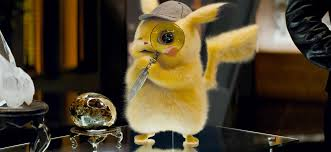

- This PDF file looks great to human eyes.
- However, the text was OCRd without any regard to language or script.  
- It looks like this: 
```text
ÏÎ ÒÓ ÑÒÎÐÎÍÓ ÇÂÅÇÄ\nÂåñíîé 1926 ãîäà ÿ î÷åíü ãîðÿ÷èëñÿ.\nß ïîêèäàë Áåðëèí äî âûõîäà «Ïîòåìêèíà» íà ýêðàíû Ãåðìàíèè —\nïåðâîé çàðóáåæíîé ñòðàíû, ãäå îí áûë ïîêàçàí*.\nÅùå â êàíóí îòúåçäà ÿ ñïîðèë ñ ìàëîîïûòíûìè ïðîêàò÷èêàìè\nôèëüìà îá îñíîâíîì ðåêëàìíîì «òåçèñå», ïîä êîòîðûì âûïóñêàòü\nêàðòèíó.\nß êðè÷àë èì, ÷òî íàäî çàãîëîâêîì ðåêëàìû âñþäó ñòàâèòü ñëî-\nâà: «Ôèëüì áåç çâåçä».\nÀ îíè áîÿëèñü, ÷òî ýòî ïàãóáíî îòðàçèòñÿ íà ñáîðàõ.\nÂ äàëüíåéøåì îíè äàæå âïèñàëè òèòð îá ó÷àñòèè â ôèëüìå…\nàðòèñòîâ Ìîñêîâñêîãî Õóäîæåñòâåííîãî òåàòðà (!!!)*.\nÏðàâ îêàçàëñÿ ÿ: íà ñëåäóþùèé äåíü ïîñëå âûõîäà ôèëüìà íà\nýêðàíû èìåííî ïîä ýòèì çíàêîì — «ôèëüì áåç çâåçä» — ïîíåñ-\nëèñü ïîòîêè îäîáðèòåëüíûõ ðåöåíçèé.\nÑåé÷àñ ÿ âñïîìèíàþ ýòîò ýïèçîä, ïîòîìó ÷òî îòñóòñòâèå «çâåçä»\nâ ýòîì ôèëüìå áûëî îäíîé èç ïðè÷èí, ïî÷åìó âíèìàíèå âíóòðè\nñàìîé ðàáîòû åñòåñòâåííî îáðàòèëîñü â ñòîðîíó áåñ÷èñëåííûõ\nêèíåìàòîãðàôè÷åñêèõ ïðîáëåì, êîòîðûå îáû÷íî â óñëîâèÿõ «çâåç-\näíîãî áëåñêà» ïðîòàãîíèñòîâ â äðóãèõ ïðîäóêöèÿõ íåìèíóåìî îñòà-\nâàëèñü â òåíè.\nÊàðòèíà â âîïðîñàõ êèíåìàòîãðàôèè çàãëÿíóëà «äàëüøå çâåçä»\n— çà ïðåäåëû «êèíîçâåçäíîé ñôåðû», âíóòðè êîòîðîé â îñíîâíîì\nâðàùàëèñü 
 ```
 - It's not an encoding problem, it's a not-everything-is-English problem

In [ ]:
#@title We'll need to extract the text from the files with something that knows Russian.  This cell installs Tesseract (open-source from Google) and the Russian weights.  The first time you'll need to click on the "restart runtime" button
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr tesseract-ocr-rus flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig
from google.colab import files
import pandas as pd
!apt-get install poppler-utils
!pip install pdf2image
from pdf2image import convert_from_path
!pip install pymorphy2
import pymorphy2
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
!pip install pytesseract
import pytesseract 
from tqdm.autonotebook import tqdm 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
python-dev is already the newest version (2.7.15~rc1-1).
antiword is already the newest version (0.37-11build1).
flac is already the newest version (1.3.2-1).
lame is already the newest version (3.100-2).
pstotext is already the newest version (1.9-6build1).
swig is already the newest version (3.0.12-1).
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr-rus is already the newest version (4.00~git24-0e00fe6-1.2).
unrtf is already the newest version (0.21.9-clean-3).
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.3).
libxslt1-dev is already the newest version (1.1.29-5ubuntu0.2).
poppler-utils is already the newest version (0.62.0-2ubuntu2.10).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
libmad0 is already the newest version (0.15.1b-9ubuntu18.04.1).
libsox-fmt-mp3 is a

In [ ]:
#@title Upload and process your PDF file(s). 1. The PDF is turned into image files. 2. We use Tesseract to read the text in the image and create plain text
uploaded = files.upload()

texts=[]
for fn in uploaded.keys():
    images = convert_from_path(fn) 
    print(f'[*] processing {fn}')
    for i, img in tqdm(enumerate(images), total=len(images)): 
        ocr_result = pytesseract.image_to_string(img, lang='rus')
        texts.append({"file":fn, "page":i, "text":ocr_result})

df = pd.DataFrame(texts)
df.head()

Saving 31-139.pdf to 31-139 (3).pdf
[*] processing 31-139.pdf


,file,page,text
0,31-139.pdf,0,МЕТОД\n
1,31-139.pdf,1,А РАК\nЯ РР =“ р р\n\nри\nИ\n\nми\n\nа)\nЕ\n\n...
2,31-139.pdf,2,ПО ТУ СТОРОНУ ЗВЕЗД\n\nВесной 1926 года я очен...
3,31-139.pdf,3,\n\nНа съемках эпизода «Покаяние Ивана» для т...
4,31-139.pdf,4,БЕДНЫЙ САЛЬЕРИ\n(вместо посвящения)\n\nЗвуки у...


In [ ]:
#@title Export the results as a CSV file.  Enter the filename for your file below.
filename = "output.csv" #@param {type:"string"}
df.to_csv(filename)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title You might prefer one text file.
#for file in df['file'].unique():
#    txt_df = df[df['file'] == file]
txt = ' '.join(df['text'].tolist())
Path('txt_file.txt').write_text(txt)
files.download('txt_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Or even better, let's lemmatize, remove stop words and punctuation.
file_name = "me.txt" #@param {type:"string"}
from pathlib import Path 
lemmatizer = pymorphy2.MorphAnalyzer()
from spacy.lang.ru import Russian
nlp = Russian()

def preprocess_text(txt):
        doc = nlp(txt)
        p = [lemmatizer.parse(token.text)[0].normal_form for token in doc if not token.is_stop and not token.is_punct]
        return ' '.join([i for i in p])

txt = ' '.join(df['text'].tolist())
txt = preprocess_text(txt)
Path(file_name).write_text(txt)
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>